In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(root_dir)

In [3]:
from src.activation_dataset import ActivationDataset
from src.cluster_analyzer import ClusterAnalyzer
from src.cluster_visualizer import ClusterVisualizer

In [4]:
dataset = ActivationDataset()

In [5]:
CHECKPOINT_DIR = root_dir + '/ckpts/2025-02-13_09-26-08'
dataset.load(os.path.join(CHECKPOINT_DIR, 'strong_activation_dataset.pkl'))

In [6]:
cluster_analyzer = ClusterAnalyzer()

In [7]:
n_clusters = 3

In [10]:
visualizer = ClusterVisualizer()

## Analyze across all layers

In [8]:
layer_names = ['actor_mlp_1', 'actor_mlp_3', 'actor_mlp_5']

In [9]:
clustering_results = cluster_analyzer.analyze_phases(
    dataset, 
    algorithm='kmeans',
    n_clusters=n_clusters,
    layer_names=layer_names
)

/home/nick_work/miniconda3/envs/eureka_analysis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


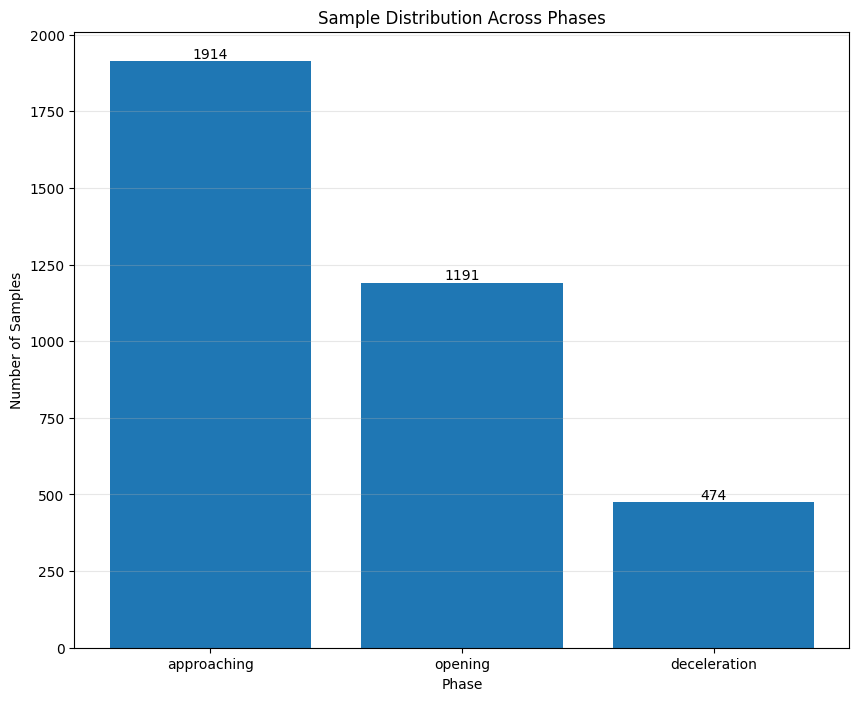

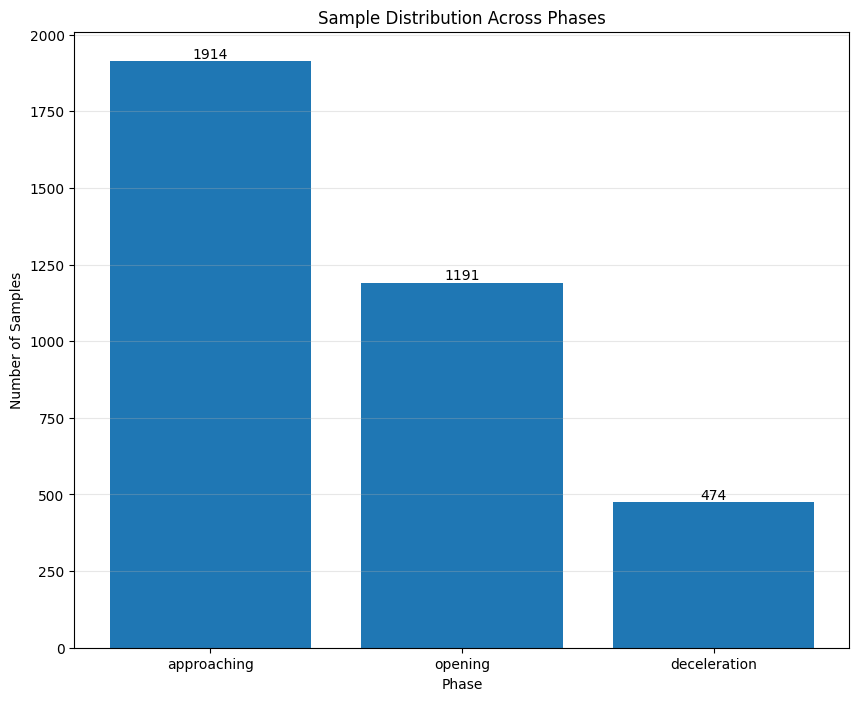

In [11]:
visualizer.plot_phase_distribution(clustering_results)

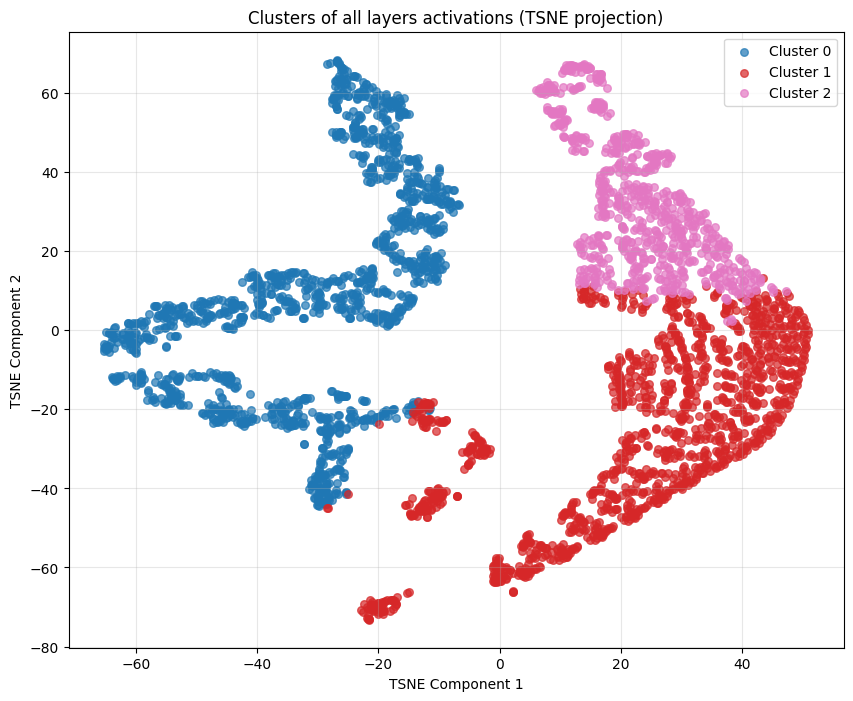

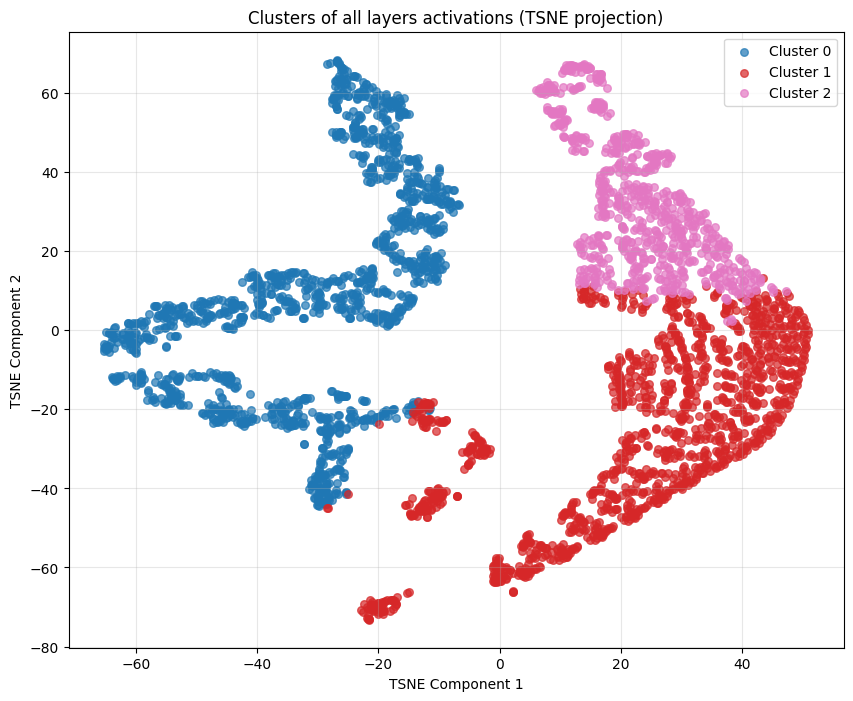

In [12]:
visualizer.plot_clusters_2d(clustering_results, 'all layers')

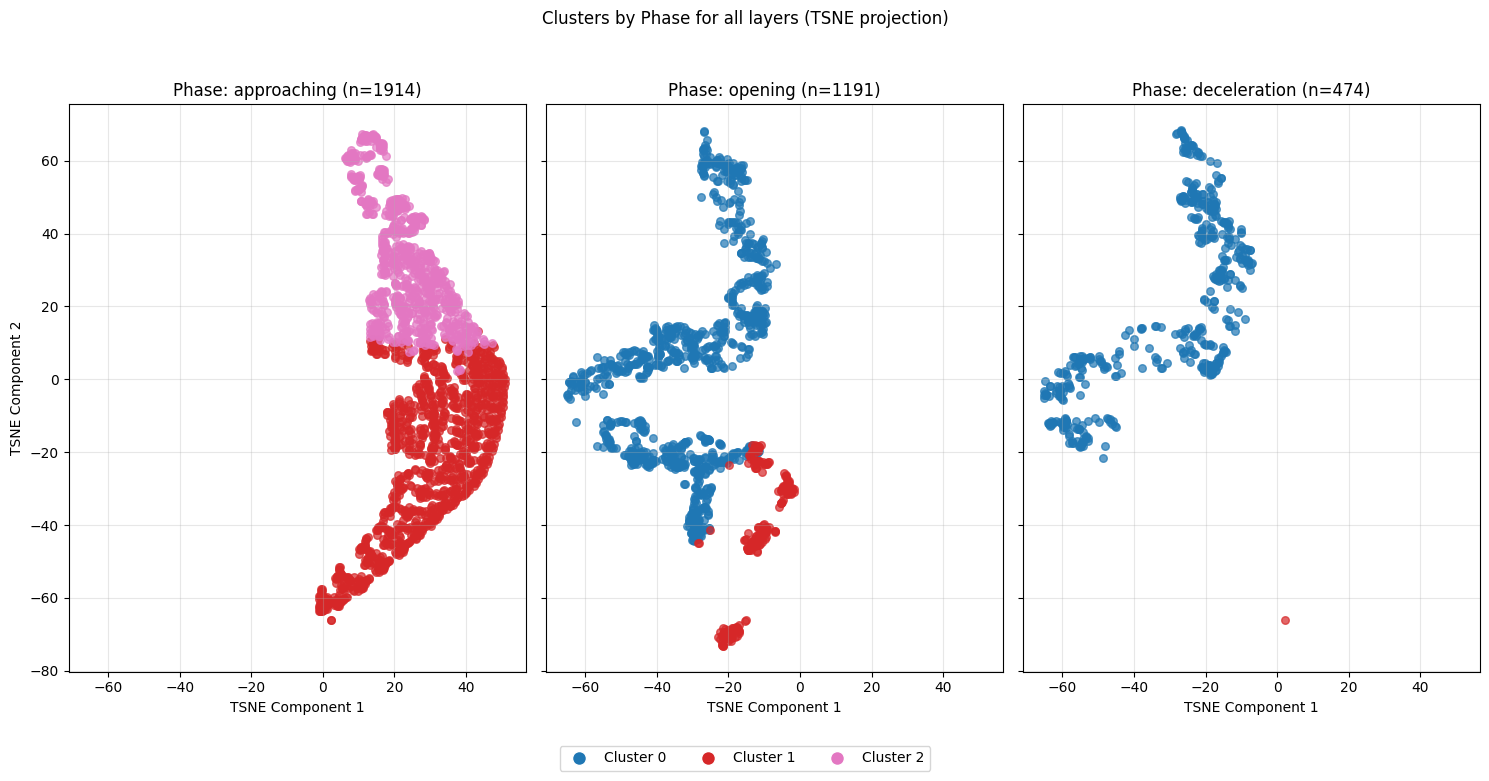

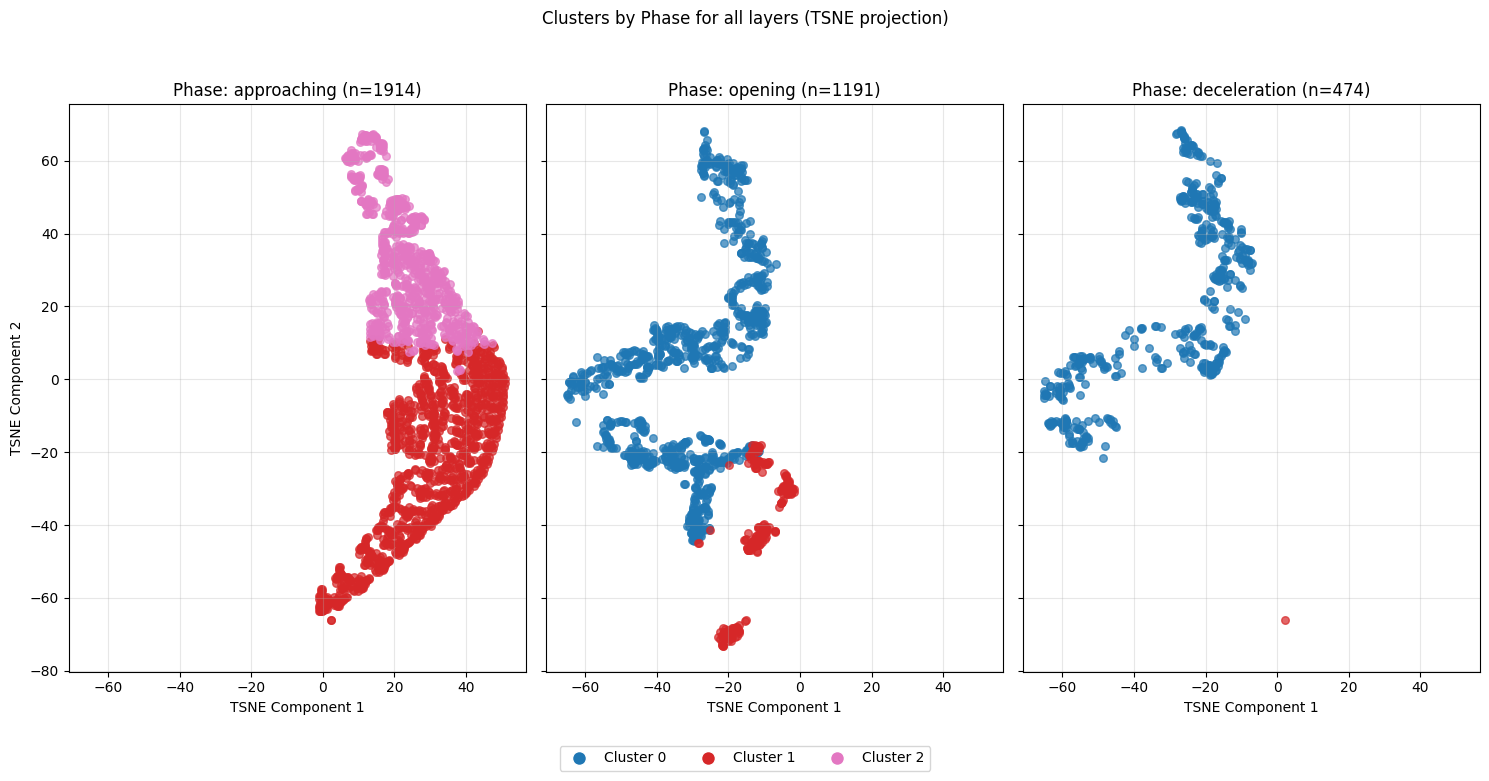

In [13]:
visualizer.plot_clusters_by_phase(clustering_results, 'all layers')

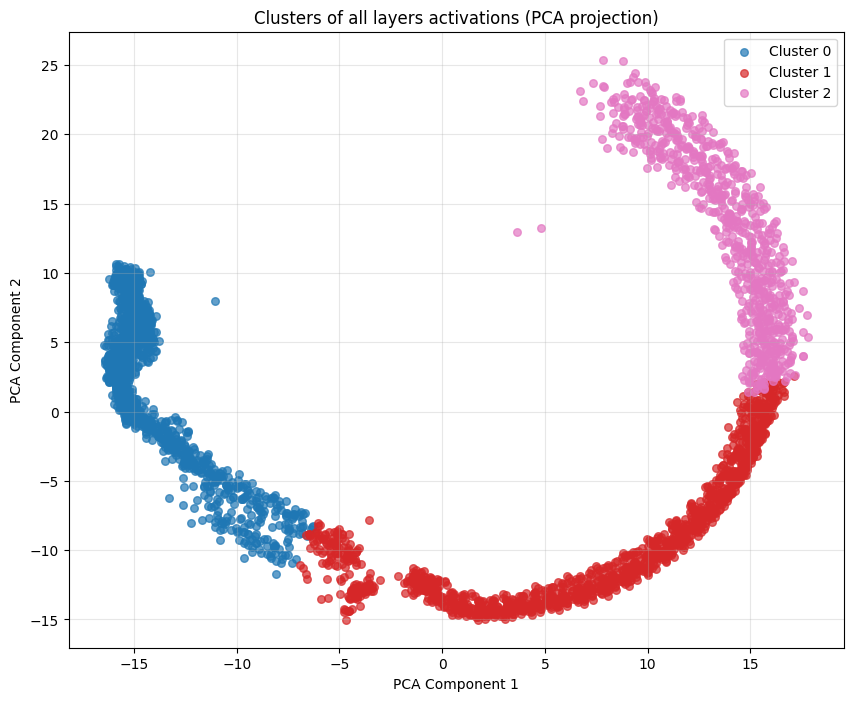

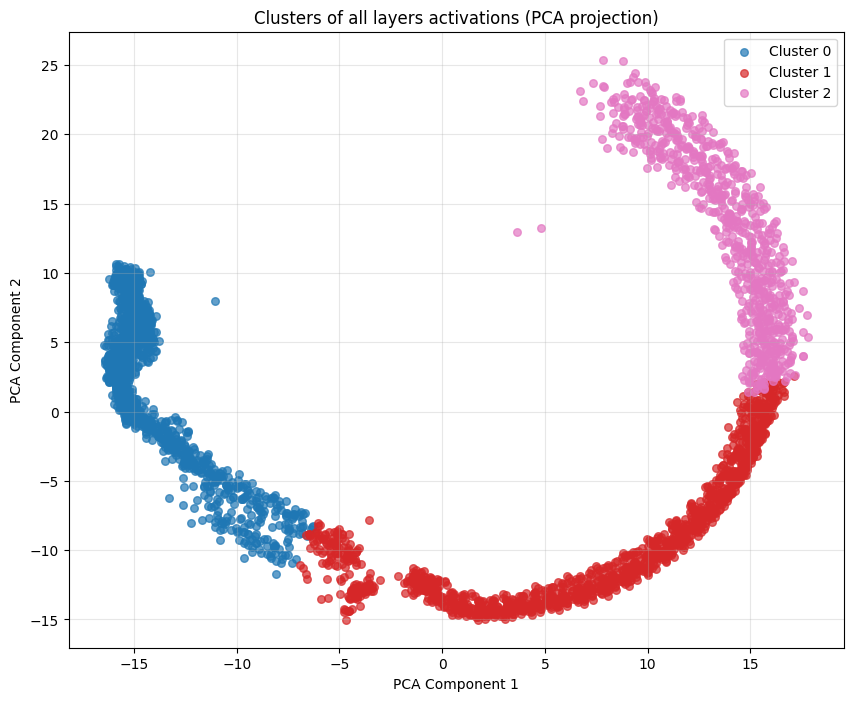

In [14]:
visualizer.plot_clusters_2d(clustering_results, 'all layers', method='pca')

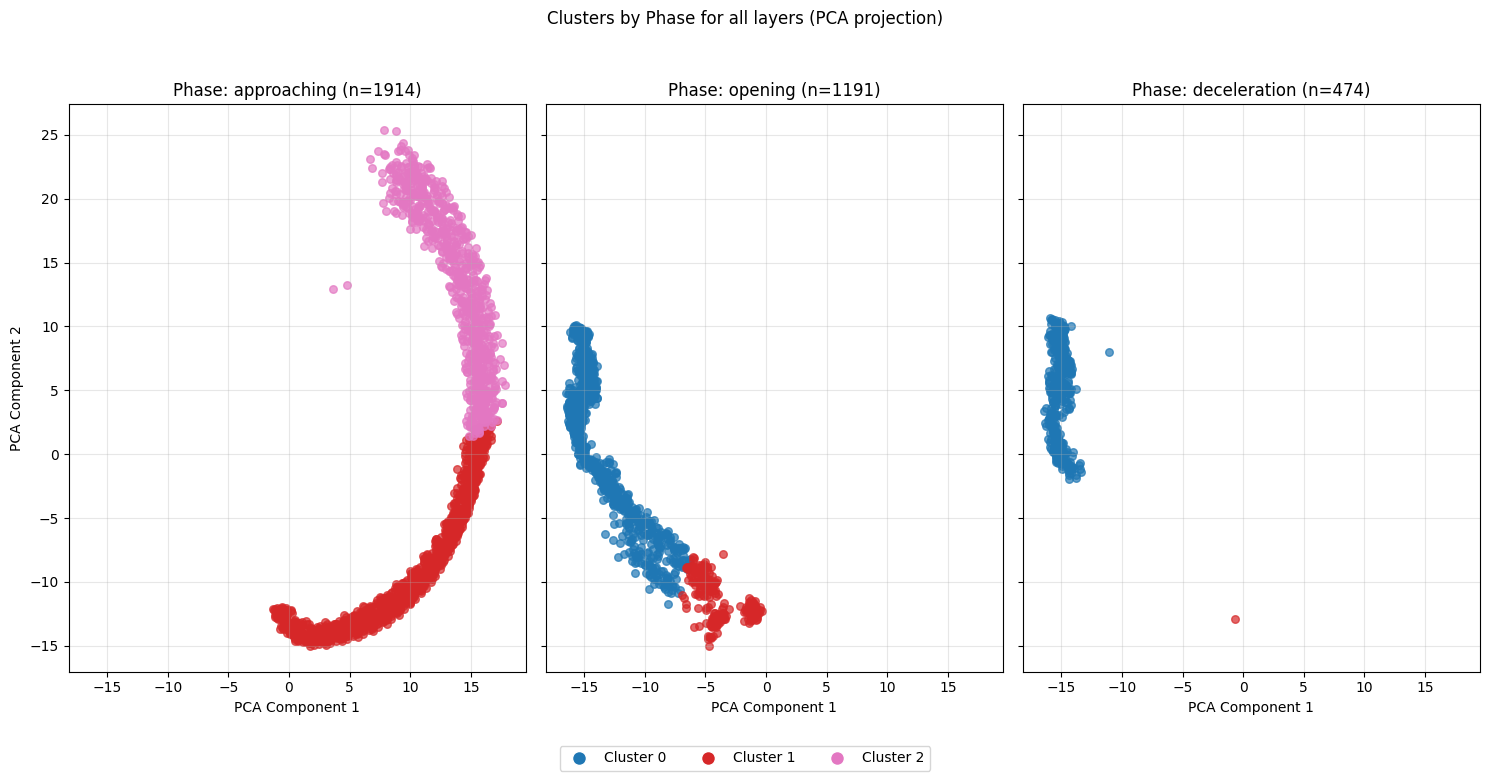

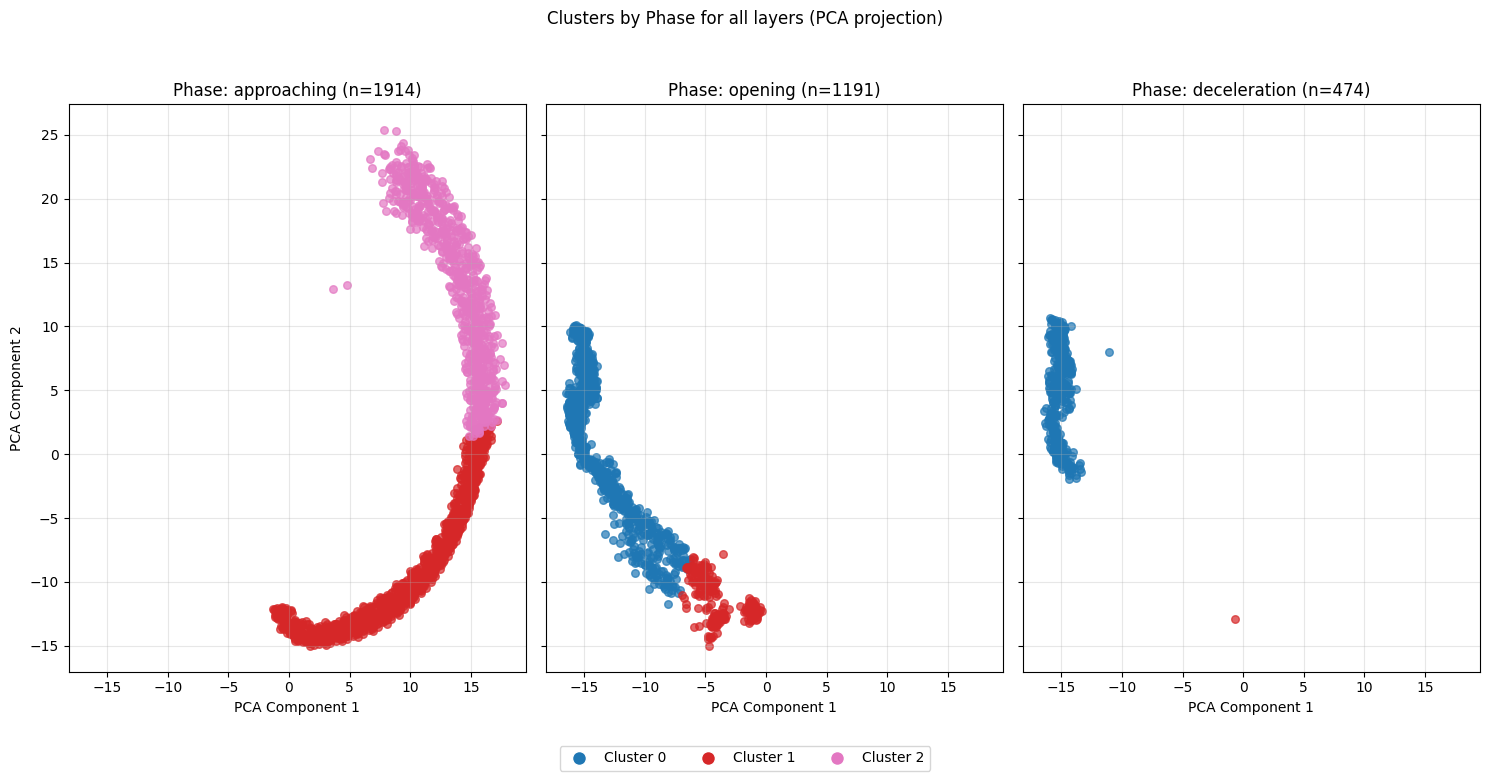

In [15]:
visualizer.plot_clusters_by_phase(clustering_results, 'all layers', method='pca')

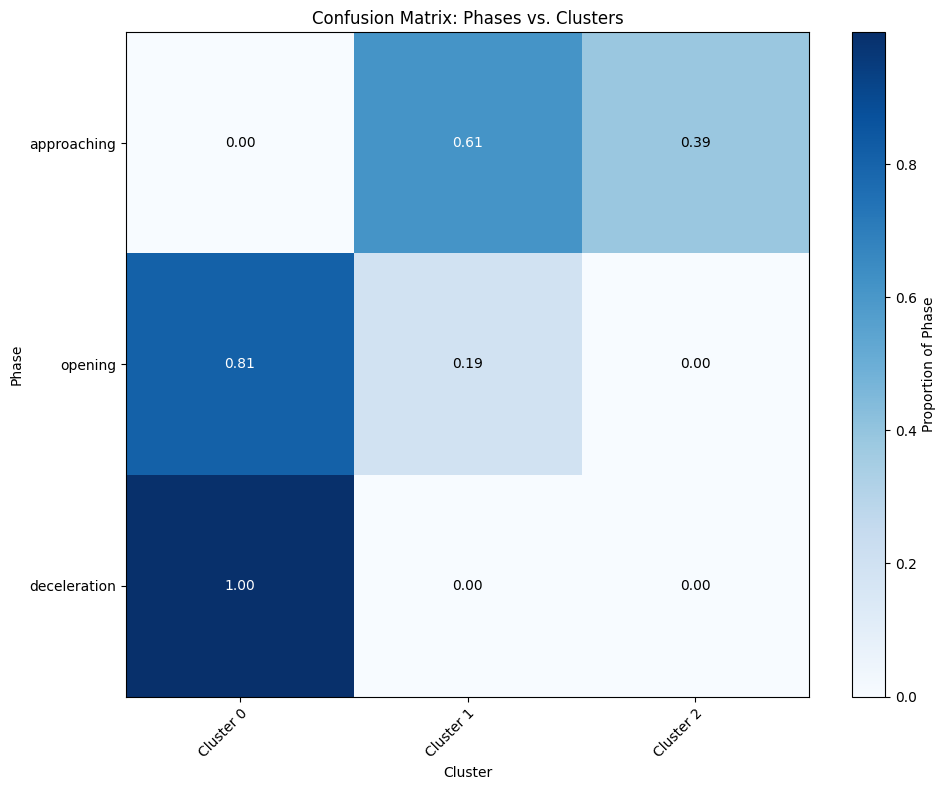

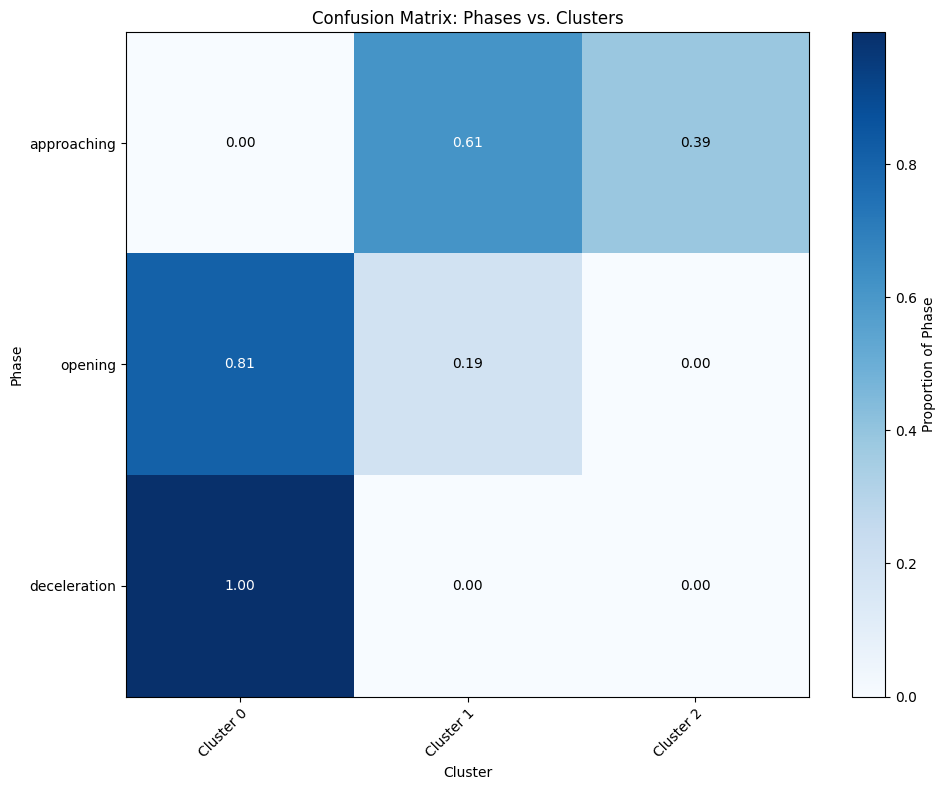

In [16]:
visualizer.plot_cluster_phase_confusion(clustering_results)

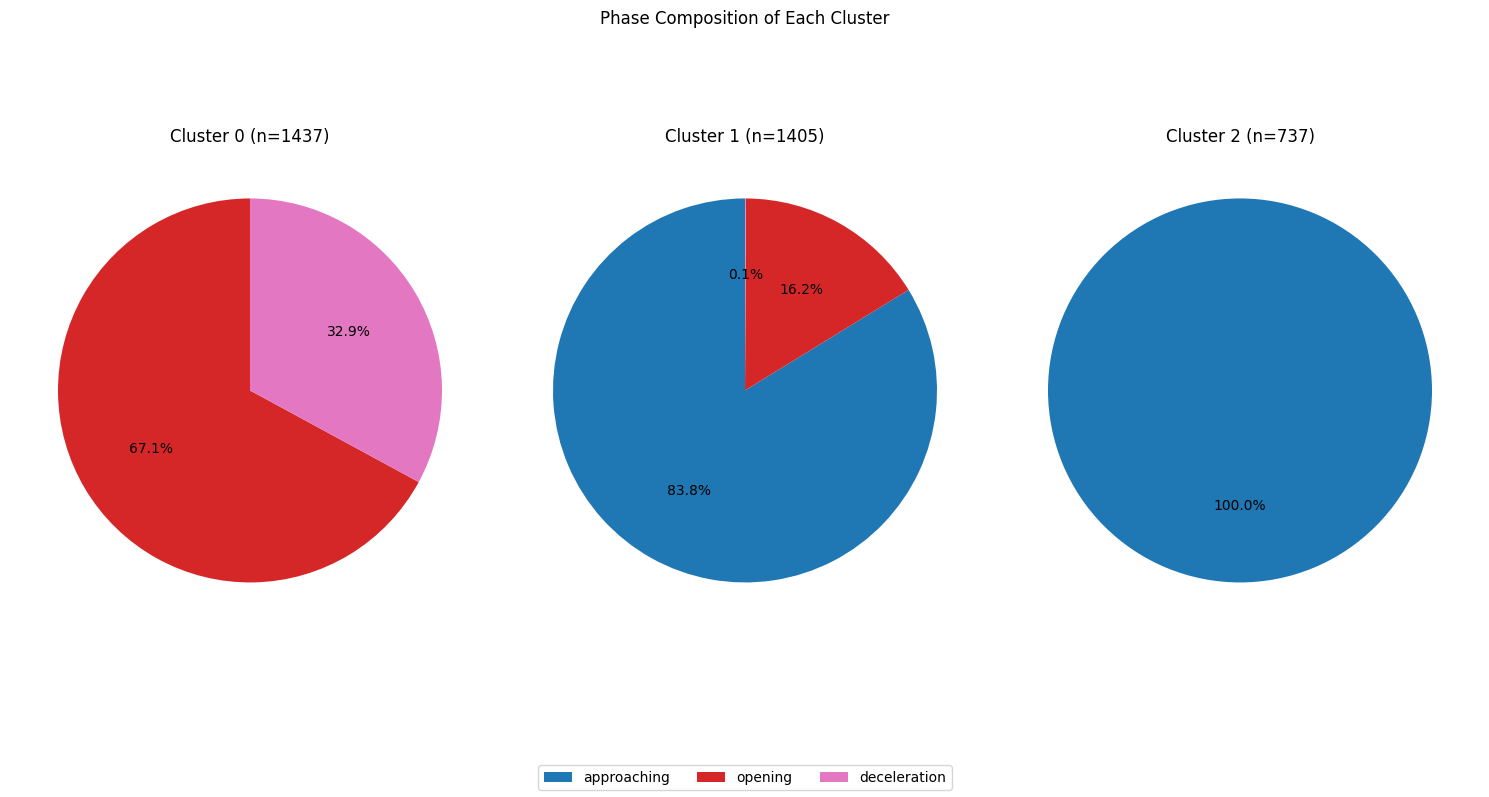

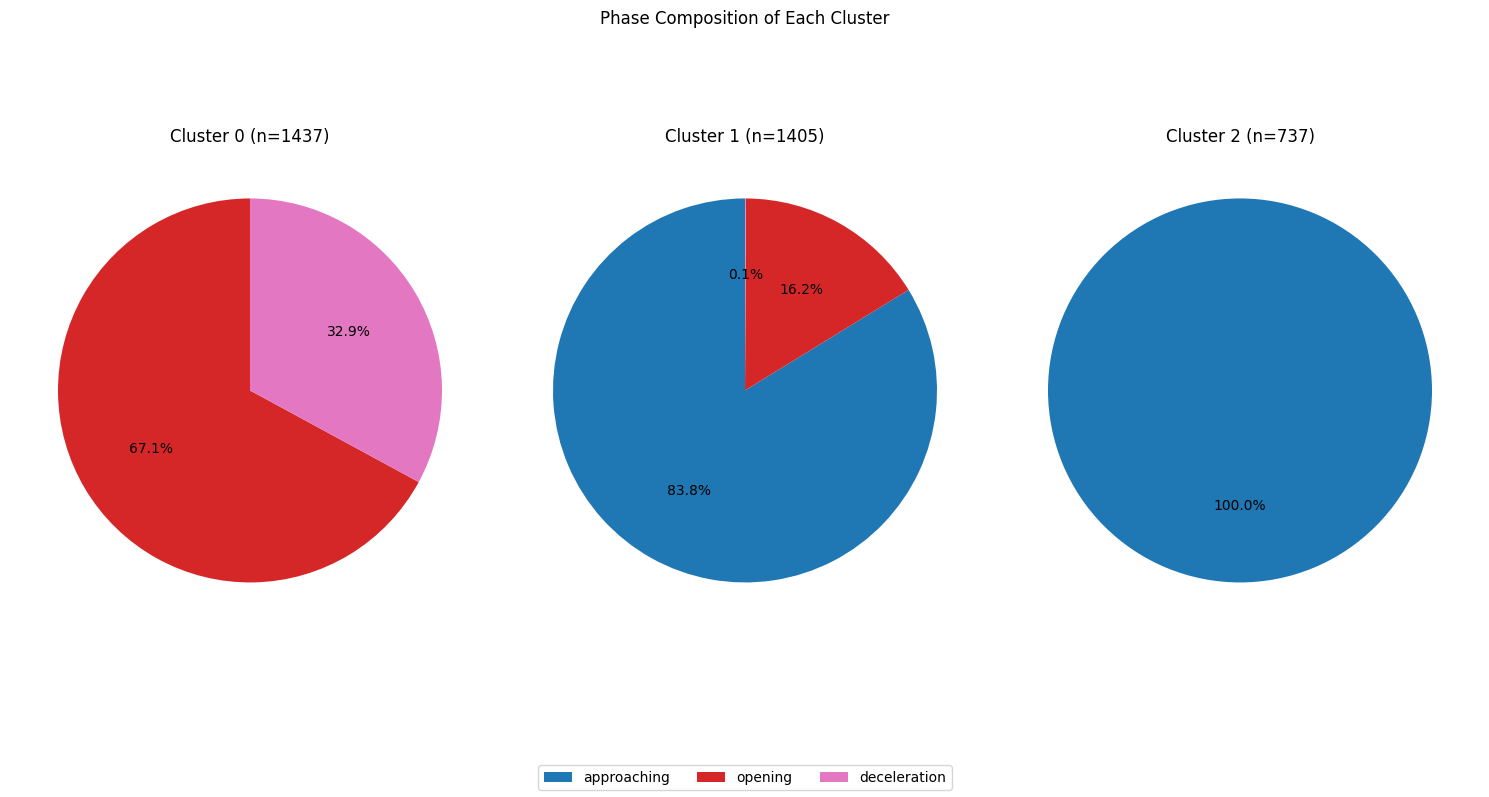

In [17]:
visualizer.plot_cluster_composition(clustering_results)

/home/nick_work/miniconda3/envs/eureka_analysis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nick_work/miniconda3/envs/eureka_analysis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nick_work/miniconda3/envs/eureka_analysis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nick_work/miniconda3/envs/eureka_analysis/lib/python3.8/site-packages/

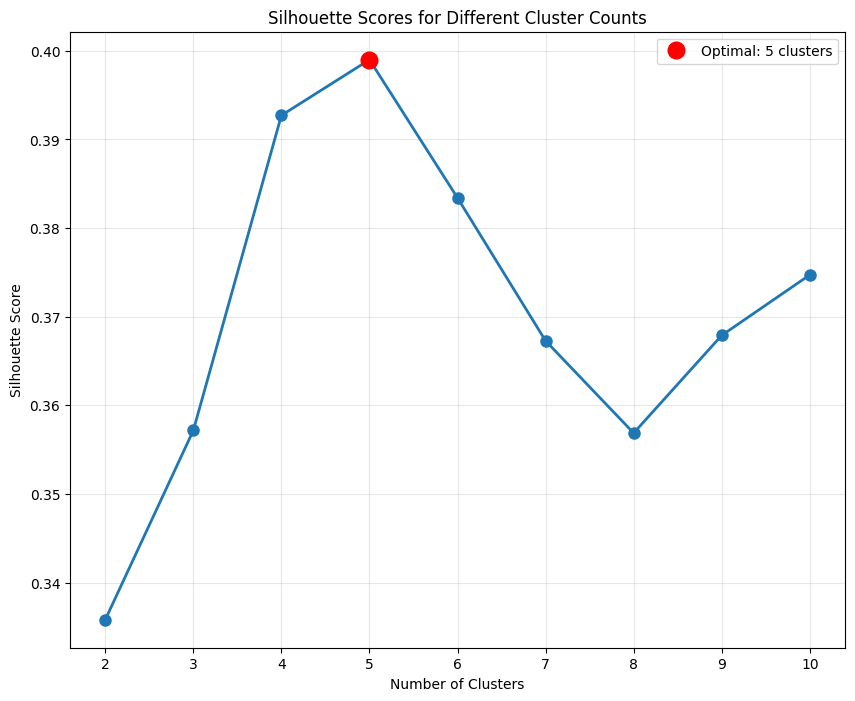

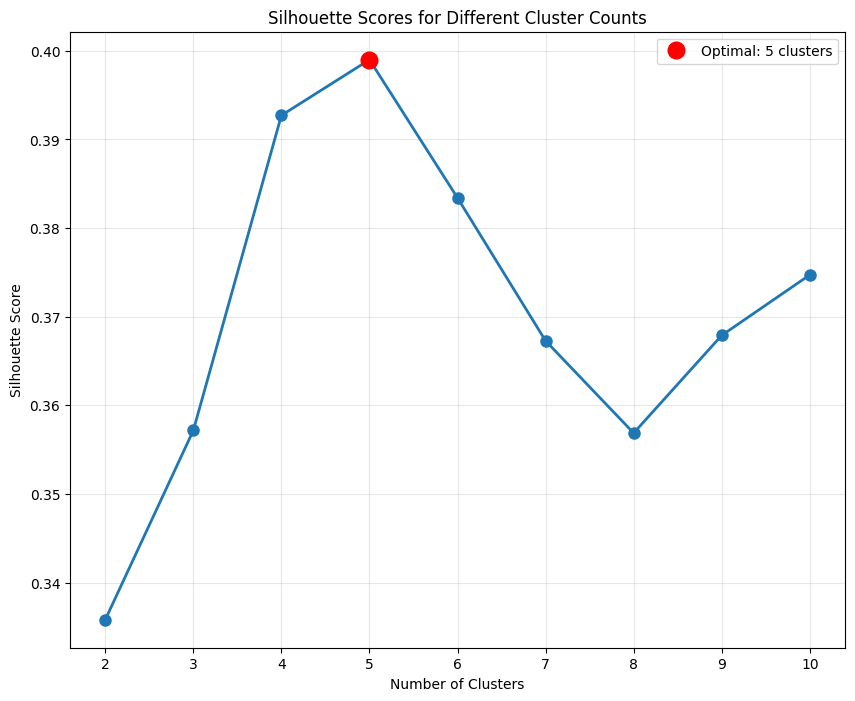

In [18]:
optimal_results = cluster_analyzer.find_optimal_clusters(clustering_results['activations'])
visualizer.plot_silhouette_scores(optimal_results['all_results'])

## Analyze across a single layer

In [23]:
layer_name = 'actor_mlp_1'

In [24]:
clustering_results = cluster_analyzer.analyze_phases(
    dataset, 
    layer_name, 
    algorithm='kmeans',
    n_clusters=n_clusters
)

/home/nick_work/miniconda3/envs/eureka_analysis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


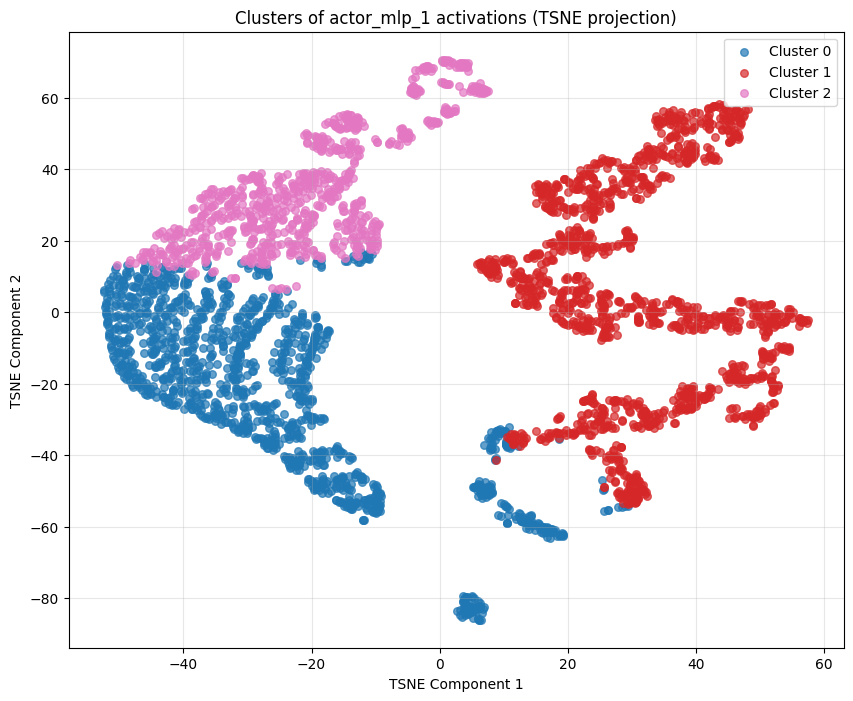

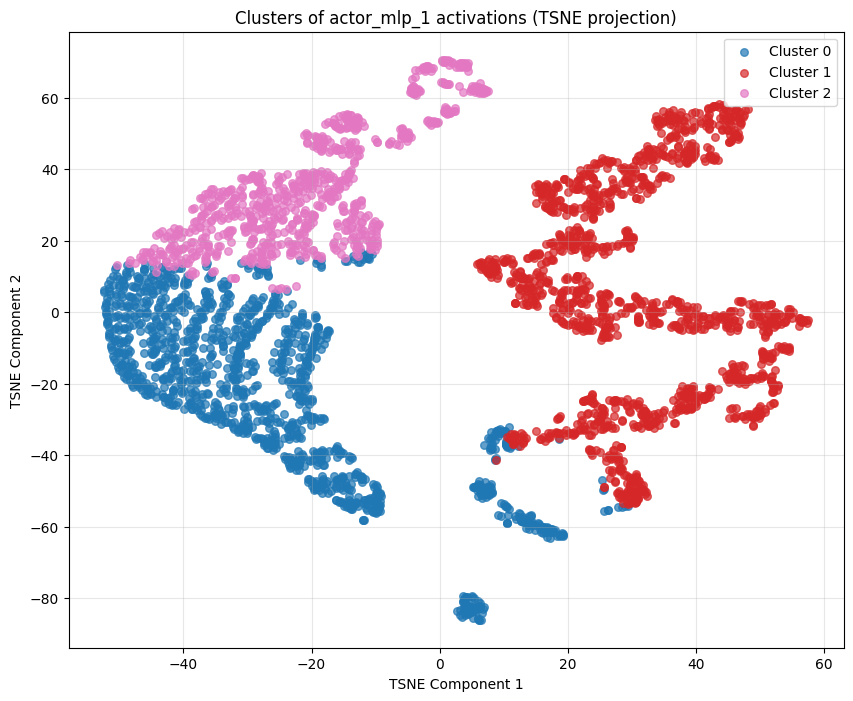

In [36]:
# Plot clusters in 2D (using dimensionality reduction), default is tsne
visualizer.plot_clusters_2d(clustering_results, layer_name)

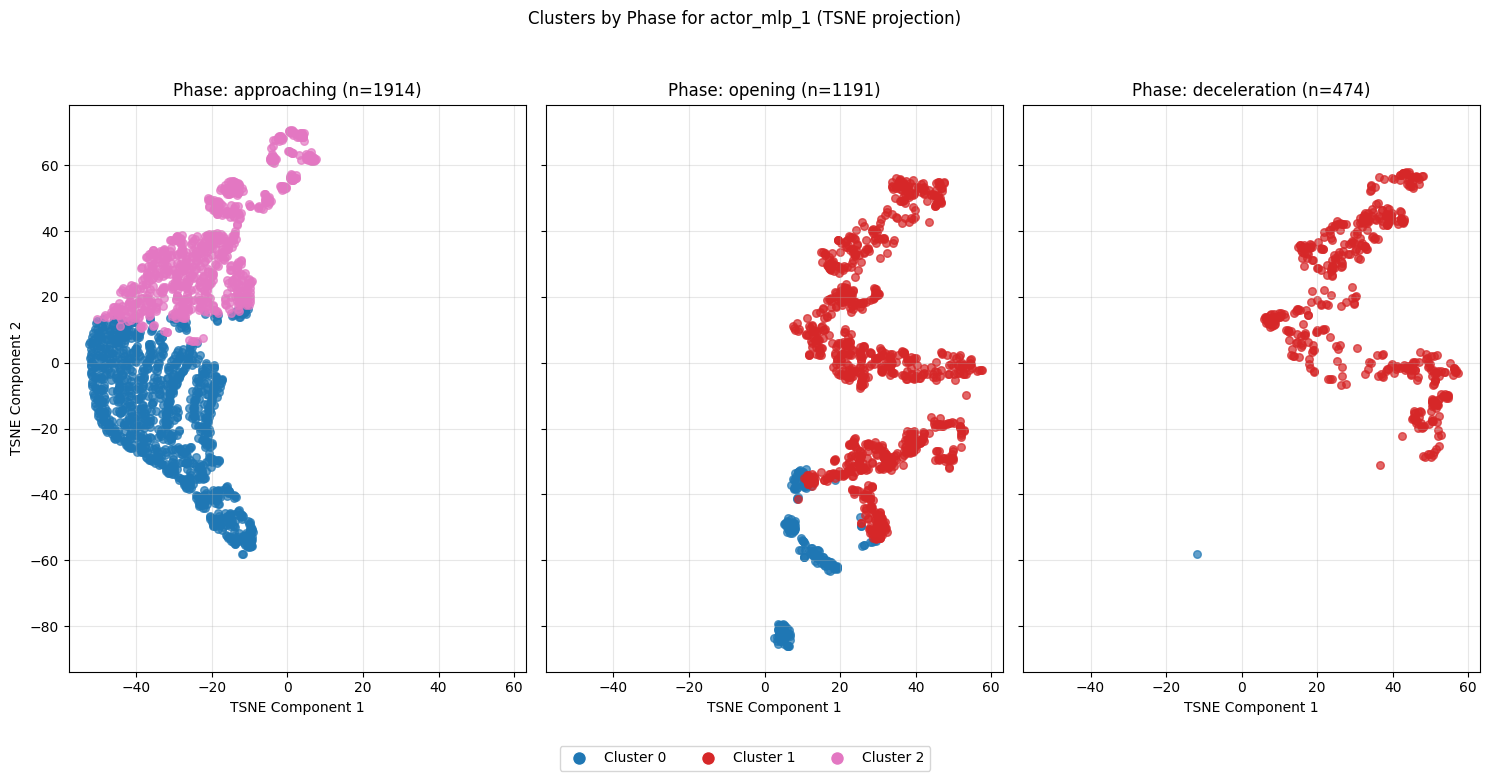

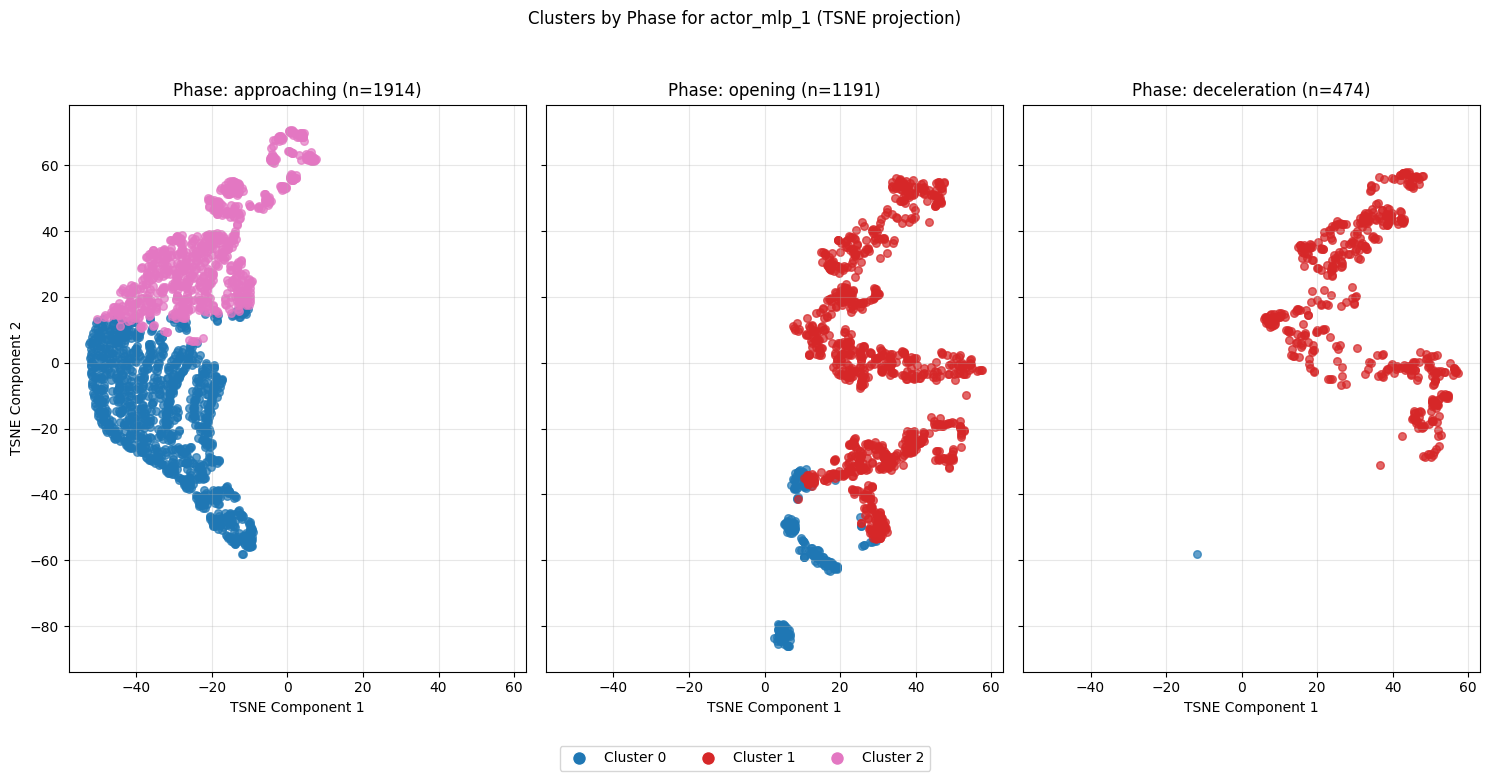

In [43]:
visualizer.plot_clusters_by_phase(clustering_results, layer_name)

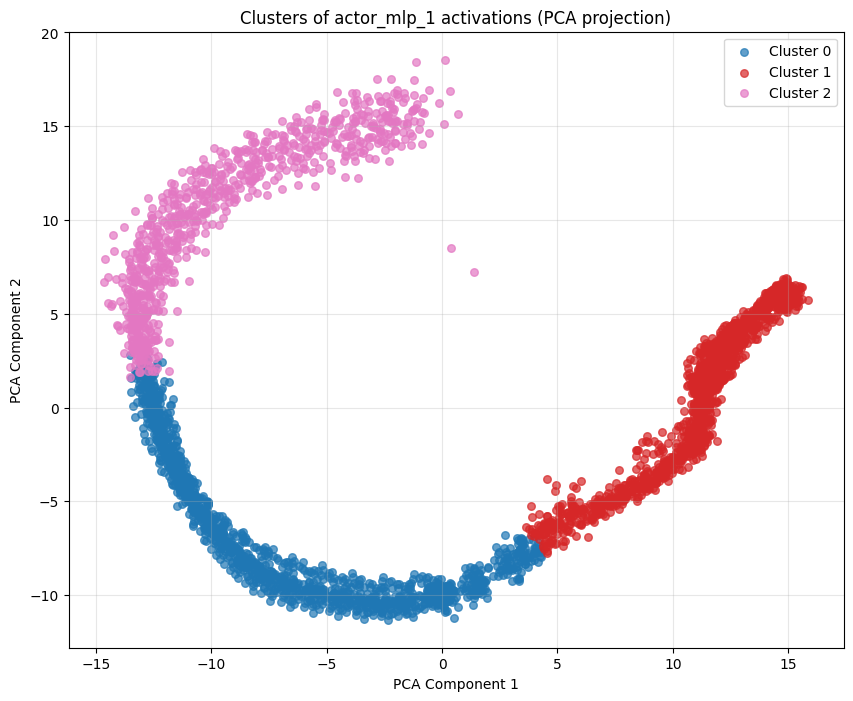

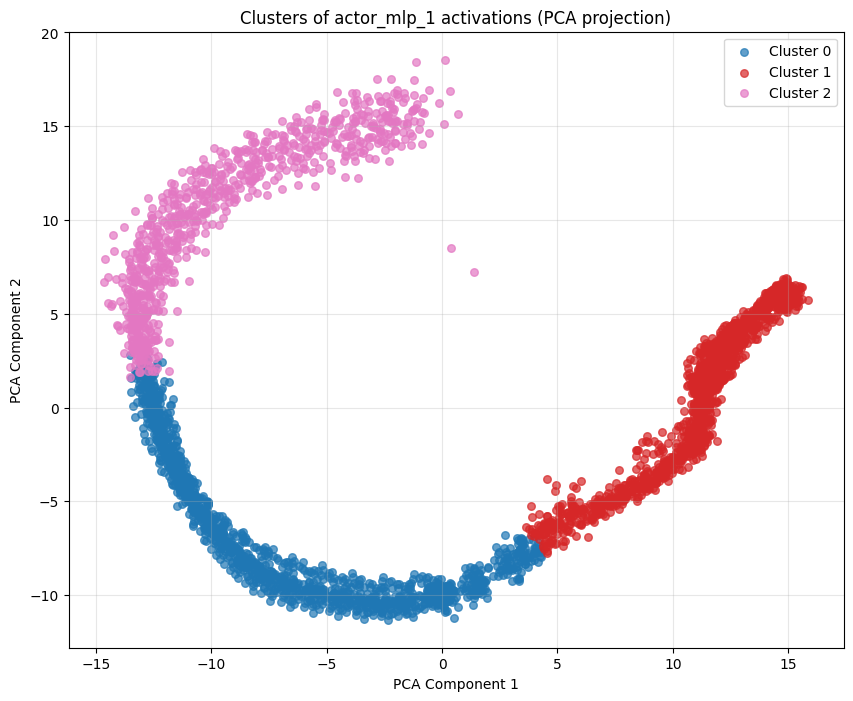

In [37]:
visualizer.plot_clusters_2d(clustering_results, layer_name, method='pca')

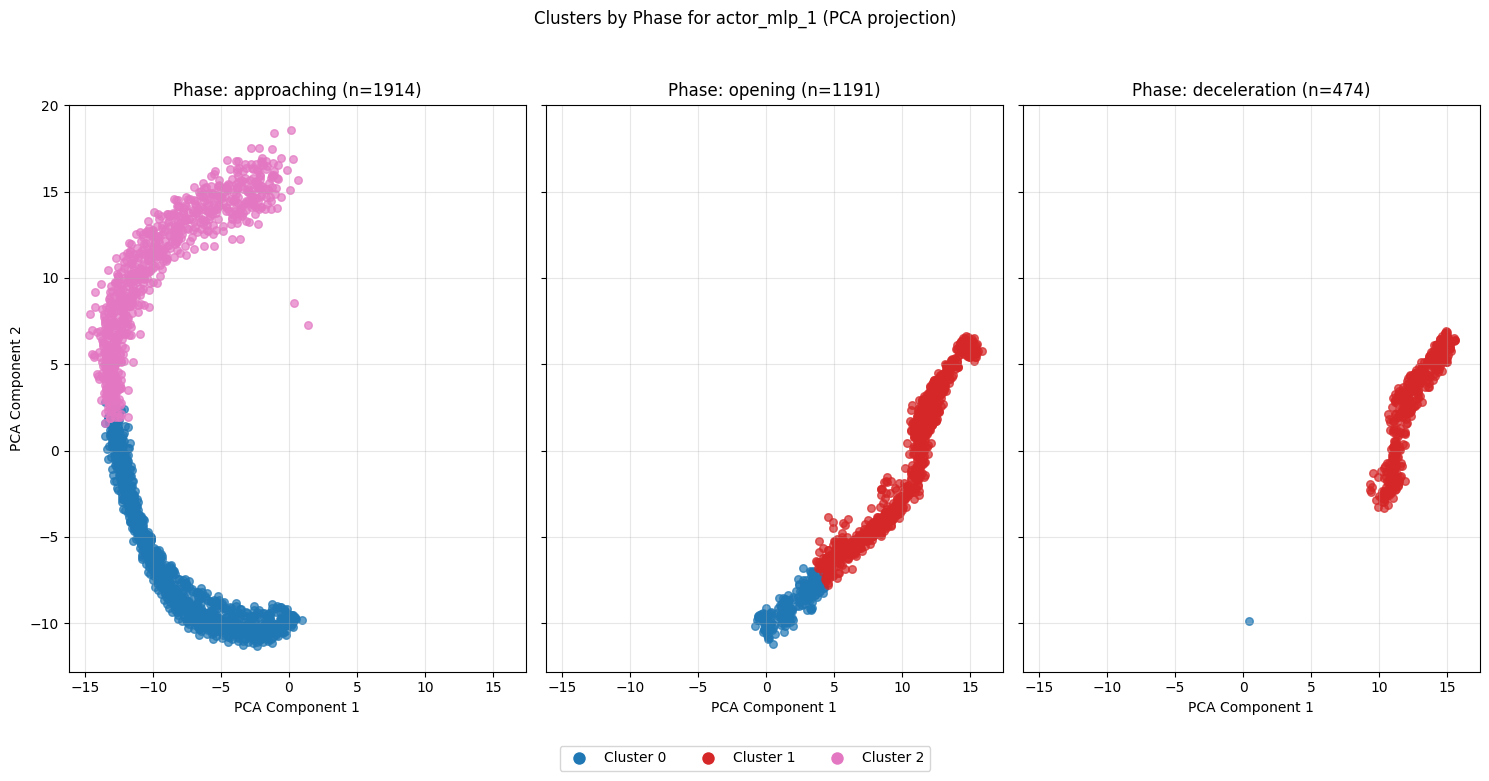

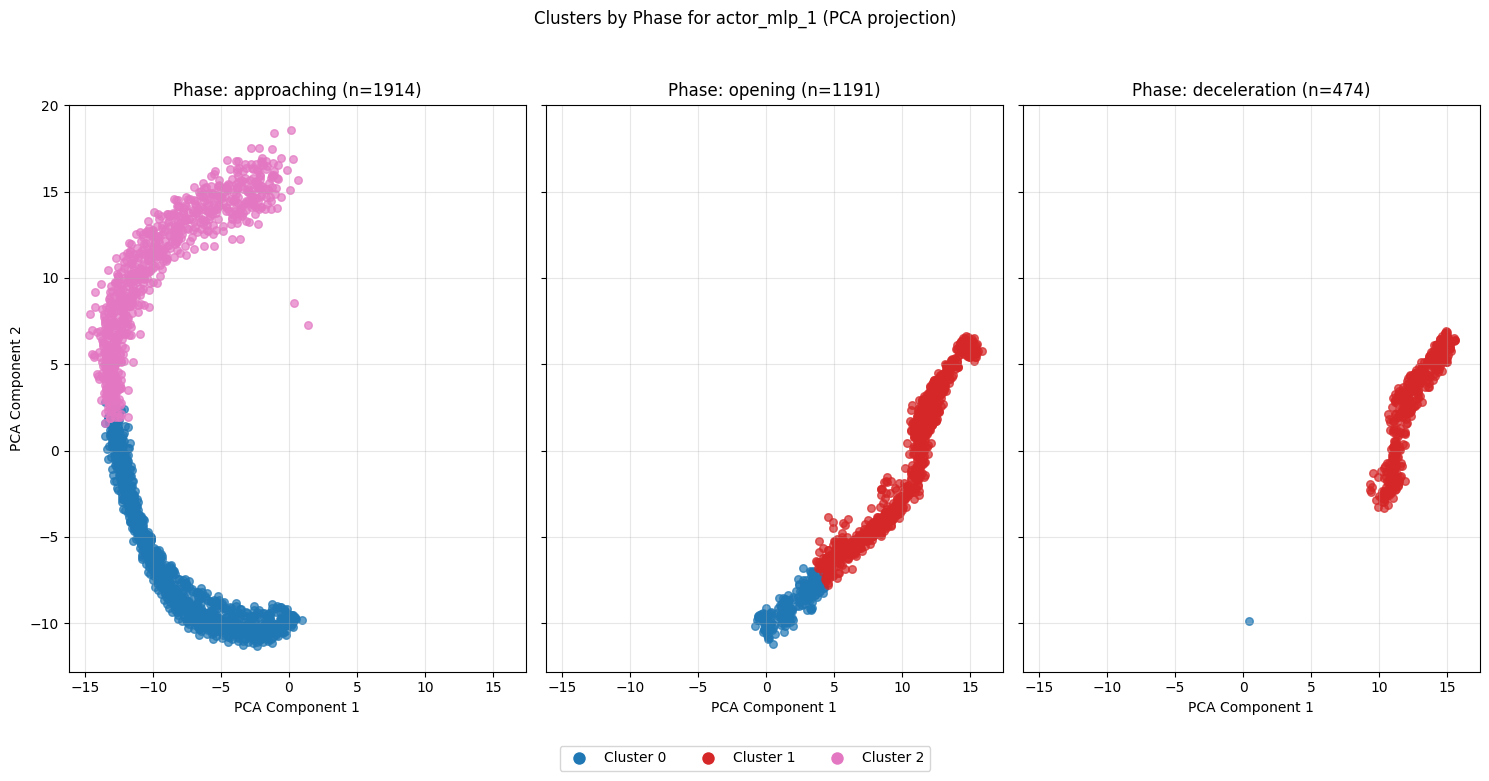

In [44]:
visualizer.plot_clusters_by_phase(clustering_results, layer_name, method='pca')

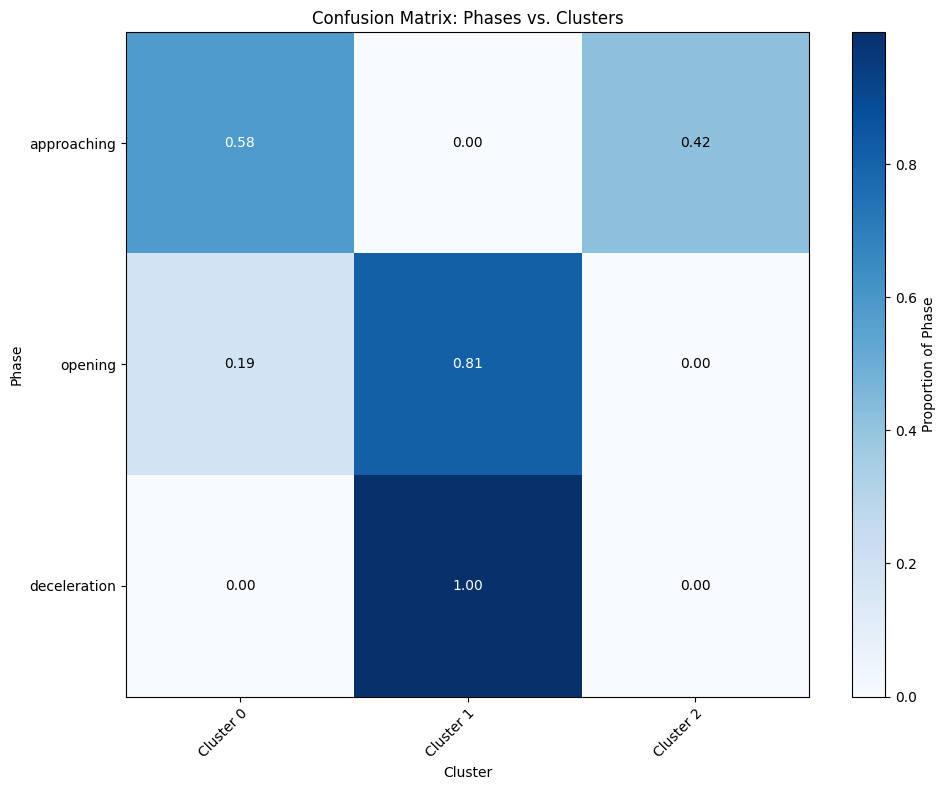

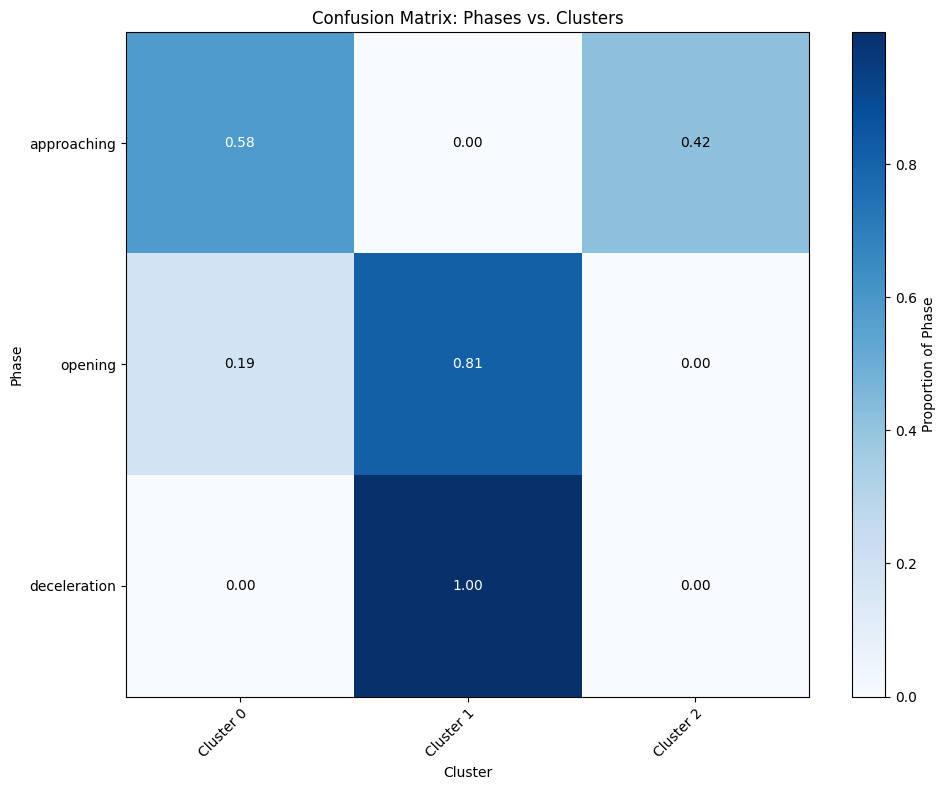

In [45]:
# confusion matrix
visualizer.plot_cluster_phase_confusion(clustering_results)

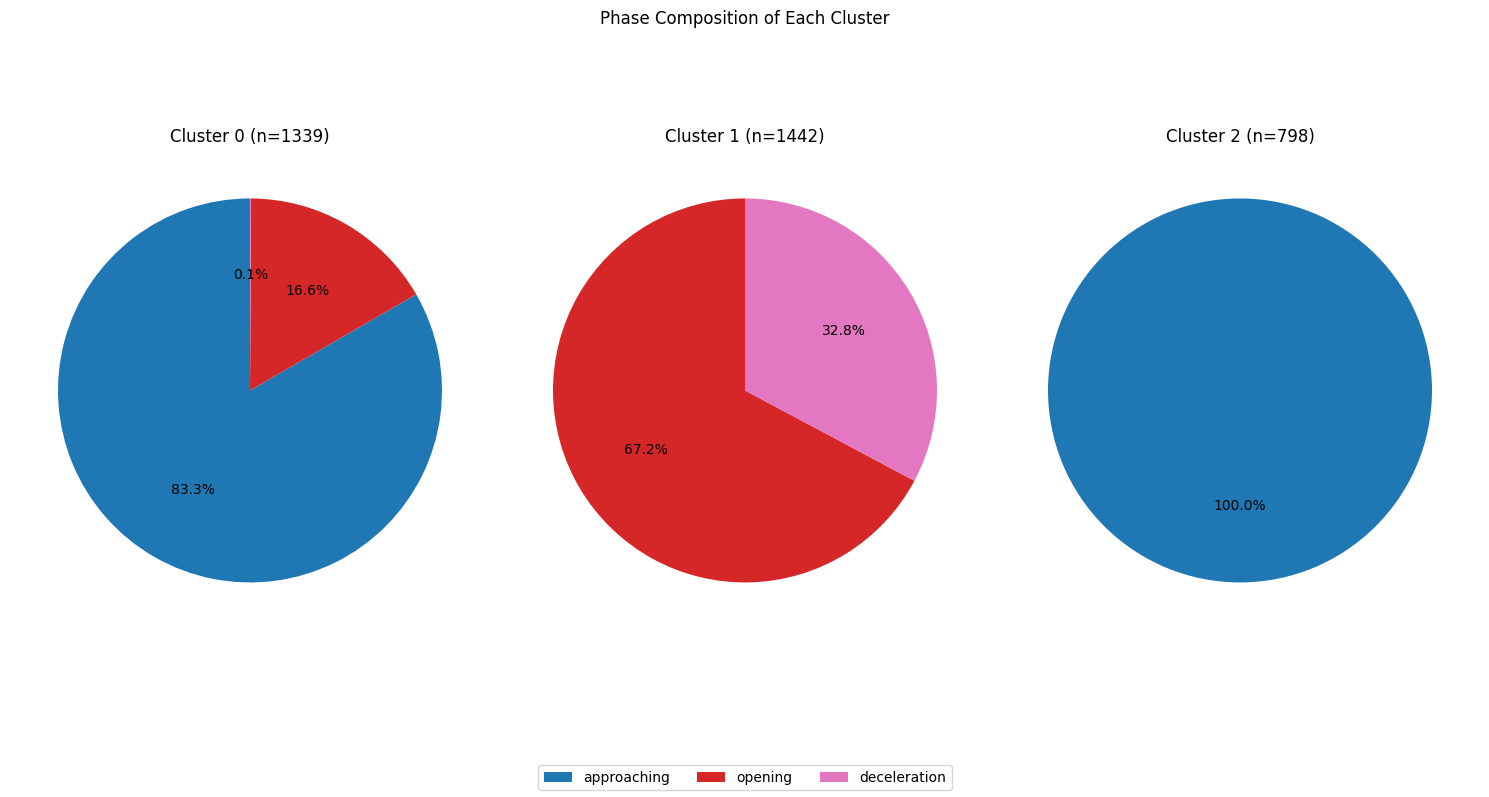

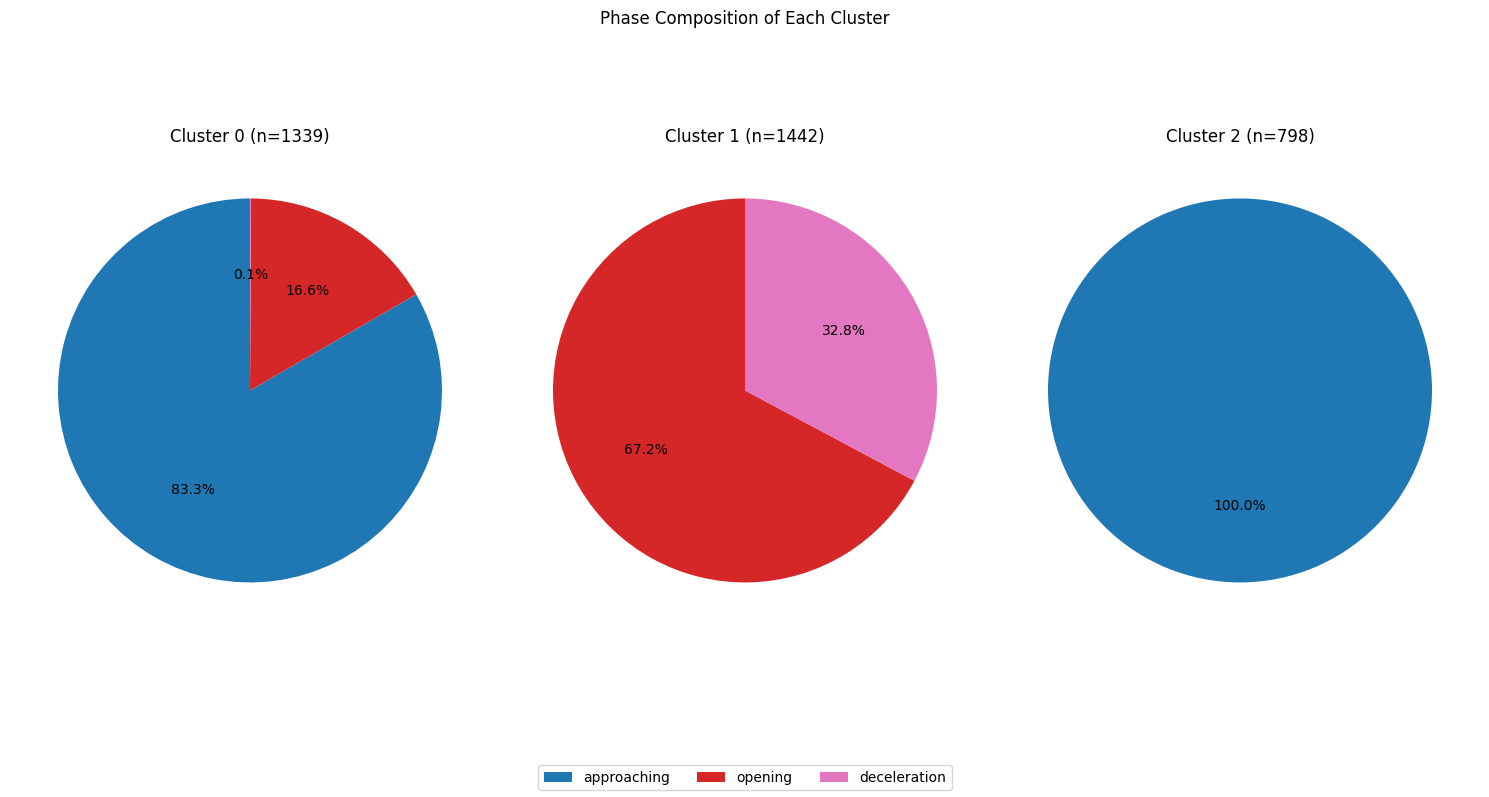

In [47]:
# pie charts of cluster composition by phase
visualizer.plot_cluster_composition(clustering_results)

In [48]:
# optimize number of clusters
optimal_results = cluster_analyzer.find_optimal_clusters(clustering_results['activations'])

/home/nick_work/miniconda3/envs/eureka_analysis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nick_work/miniconda3/envs/eureka_analysis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nick_work/miniconda3/envs/eureka_analysis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nick_work/miniconda3/envs/eureka_analysis/lib/python3.8/site-packages/

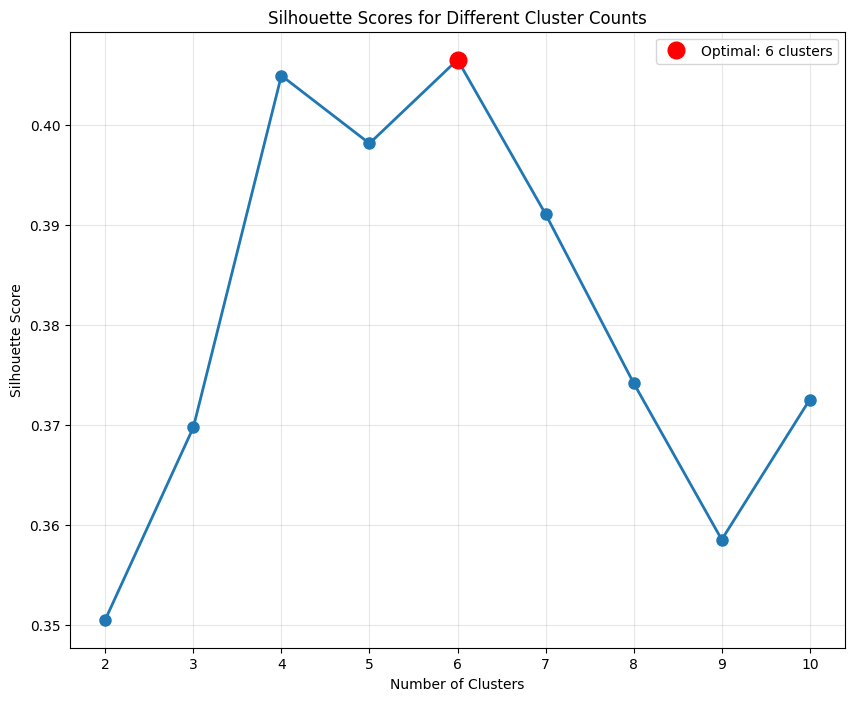

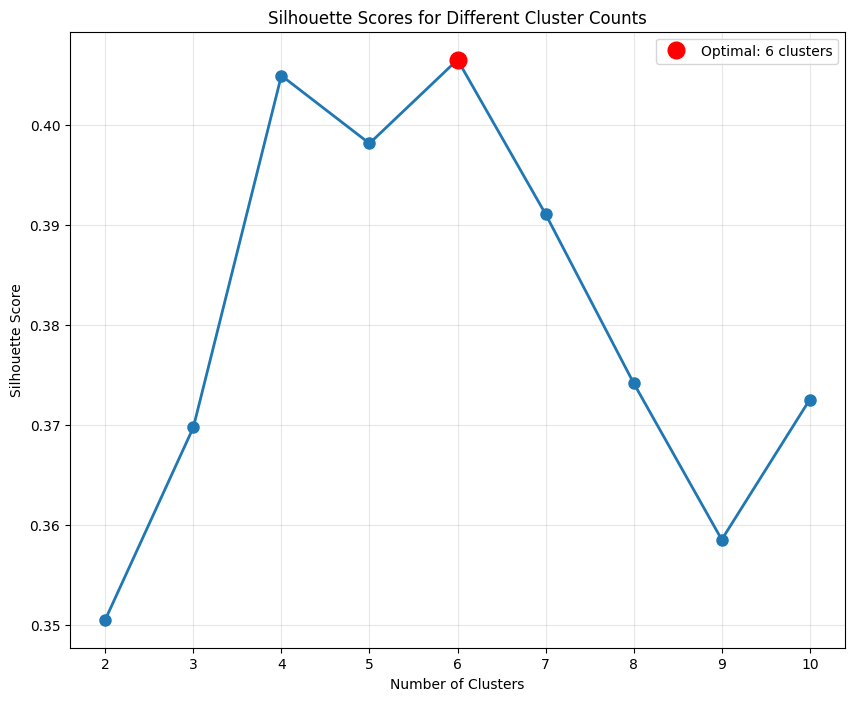

In [49]:
visualizer.plot_silhouette_scores(optimal_results['all_results'])